<a href="https://colab.research.google.com/github/pcoge/Practice/blob/master/CNN_cifar10_Keras_Colab_ipynb_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!ls -l image

total 864
-rw-r--r-- 1 root root 770493 Dec  8 11:06 airplane2.jpg
-rw-r--r-- 1 root root   6562 Dec  8 11:06 airplane.jpg
-rw-r--r-- 1 root root  17844 Dec  8 11:06 dog2.jpg
-rw-r--r-- 1 root root   4385 Dec  8 11:06 dog.jpg
-rw-r--r-- 1 root root  73644 Dec  8 11:06 truck.jpg


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

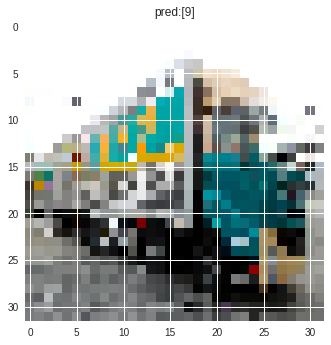

In [21]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img

#画像読み込み
temp_img=load_img("./image/truck.jpg",target_size=(32,32))

#画像を配列に変換し0-1で正規化
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

#学習済みのモデルと重みを読み込む
json_string=open('cifar10_cnn.json').read()
model=model_from_json(json_string)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('cifar10_cnn.h5')

#モデルを表示
model.summary()

#画像を予想
img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=',img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(img_pred))
plt.show()

- 0:airplane
- 1:automobile
- 2:bird
- 3:cat
- 4:deer
- 5:dog
- 6:frog
- 7:horse
- 8:ship
- 9:truck